# E-commerce Sales Analysis

## Objective
The objective of this project is to analyze e-commerce sales data to understand sales trends, profitability, customer behavior, and regional performance. The analysis aims to derive meaningful business insights that can support data-driven decision-making.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


# Load Dataset

In [2]:
df = pd.read_csv("superstore_raw.csv", encoding = 'latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Data Understanding

In [3]:
df.shape

(9994, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Observations
- The dataset contains ~10,000 records of e-commerce transactions.
- It includes order details, customer information, product categories, sales, profit, and regional data.
- Sales and profit are numeric, while order dates need proper date conversion.


# Data Cleaning

In [6]:
# Convert date columns
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Create new features
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Profit Margin"] = (df["Profit"] / df["Sales"]) * 100

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Profit Margin
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2017,11,16.00
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2017,11,30.00
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2017,6,47.00
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2016,10,-40.00
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2016,10,11.25


# Sales & Profit Trend Analysis

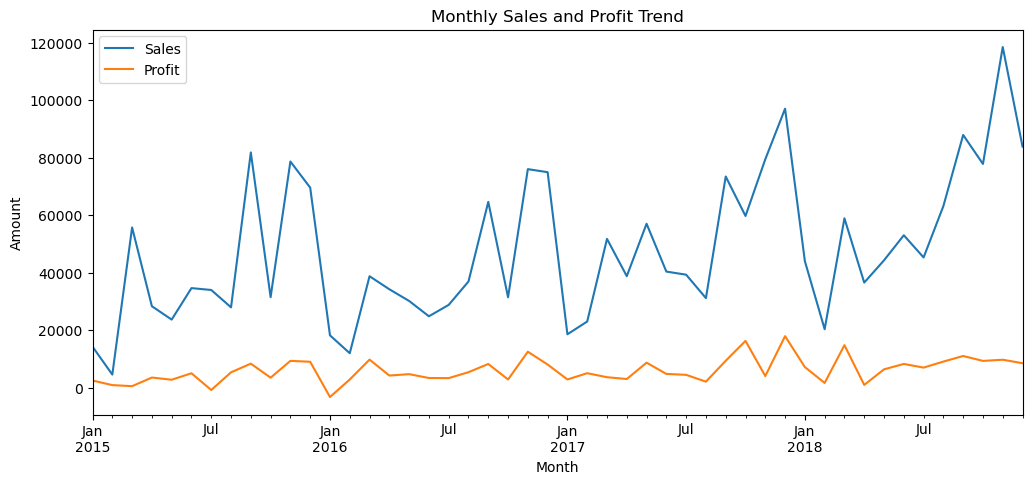

In [9]:
monthly_trend = (
    df.groupby(df["Order Date"].dt.to_period("M"))[["Sales", "Profit"]]
    .sum()
)

monthly_trend.plot(figsize=(12,5))
plt.title("Monthly Sales and Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.show()


### Insight
Sales show an overall upward trend with clear seasonality. However, profit does not always increase along with sales, indicating the impact of discounts and low-margin products.


# Category & Sub-Category Analysis

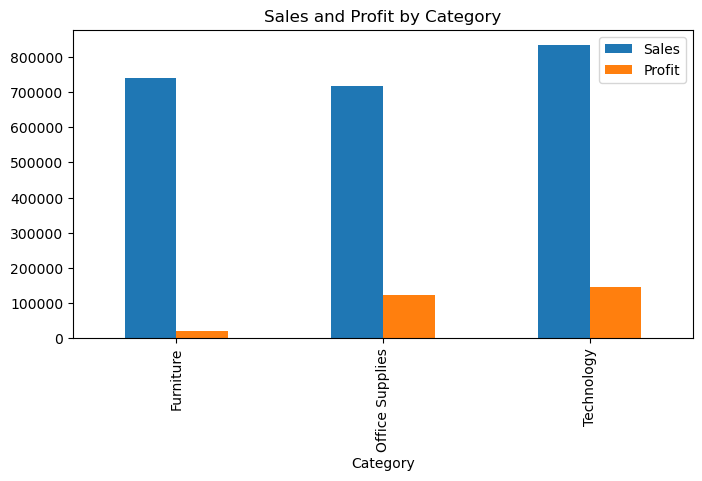

In [10]:
category_perf = df.groupby("Category")[["Sales", "Profit"]].sum()
category_perf.plot(kind="bar", figsize=(8,4))
plt.title("Sales and Profit by Category")
plt.show()


In [11]:
loss_sub_category = (
    df.groupby("Sub-Category")[["Sales", "Profit"]]
    .sum()
    .query("Profit < 0")
)

loss_sub_category


,Sales,Profit
Sub-Category,,
Bookcases,114879.9963,-3472.5560
Supplies,46673.5380,-1189.0995
Tables,206965.5320,-17725.4811


### Insight
Technology is the most profitable category, while Furniture shows low profitability. Sub-categories such as Tables and Bookcases are loss-making despite strong sales.


# Customer Analysis

In [12]:
customer_perf = (
    df.groupby("Customer Name")[["Sales", "Profit"]]
    .sum()
    .sort_values(by="Sales", ascending=False)
)

customer_perf.head(10)


,Sales,Profit
Customer Name,,
Sean Miller,25043.050,-1980.7393
Tamara Chand,19052.218,8981.3239
Raymond Buch,15117.339,6976.0959
Tom Ashbrook,14595.620,4703.7883
Adrian Barton,14473.571,5444.8055
Ken Lonsdale,14175.229,806.8550
Sanjit Chand,14142.334,5757.4119
Hunter Lopez,12873.298,5622.4292
Sanjit Engle,12209.438,2650.6769


### Insight
Some high-revenue customers generate negative profit, indicating discount-driven purchasing behavior. Profitability-focused customer segmentation is required.


# Regional Analysis

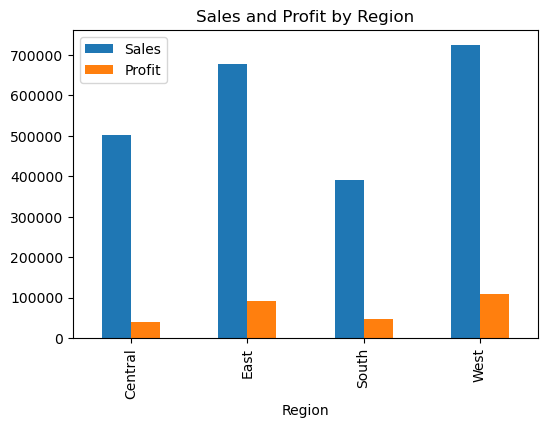

In [13]:
region_perf = df.groupby("Region")[["Sales", "Profit"]].sum()
region_perf.plot(kind="bar", figsize=(6,4))
plt.title("Sales and Profit by Region")
plt.show()


In [14]:
loss_states = (
    df.groupby("State")[["Sales", "Profit"]]
    .sum()
    .query("Profit < 0")
    .sort_values(by="Profit")
)

loss_states.head()


,Sales,Profit
State,,
Texas,170188.0458,-25729.3563
Ohio,78258.1360,-16971.3766
Pennsylvania,116511.9140,-15559.9603
Illinois,80166.1010,-12607.8870
North Carolina,55603.1640,-7490.9122


### Insight
West and East regions perform strongly in terms of profit. States such as Texas and Ohio generate high sales but incur losses, highlighting regional cost and pricing challenges.


## Key Business Insights
- Sales growth does not always translate into profit growth.
- Discounts significantly affect profitability.
- High-revenue customers and regions are not always the most valuable.
- Profit-focused strategies are essential for sustainable growth.


## Conclusion
This project demonstrates an end-to-end e-commerce sales analysis using Python and Jupyter Notebook. The analysis highlights the importance of profitability-driven decision-making and provides actionable insights for business improvement.
